In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving public_data_paper.xlsx to public_data_paper (2).xlsx


In [ ]:
df_public = pd.read_excel('public_data_paper (2).xlsx')
df_public.head()

,GioiTinh,TienSuYKhoa - VangDaSS,ChamNoi - ChamNgonNgu - AQ5,CungNhac - AQ4,CoLap - AQ10,ChoiCamGiac_VanDong,ChoiChucNang,ChoiKetHop,ChoiGiaVo - AQ8,HanhViLapLai,KyNangGiaoTiepSom - AQ3,ChoiLuanPhien - Giao TiepQuaLai - AQ6,BatChuoc - HieuCXTruuTuong - AQ7,SaiViec,PhanUngTenGoi - AQ1,DiNhonChan,ChiTro - Khoe (HieuVaBieuDatCX) - AQ9,ChuYLienKet - AQ2,TiepXucMat,TargetBinary
0,1,0,1,0,0,?,?,?,1,?,0,1,0,?,1,?,0,1,?,0
1,1,0,1,0,0,?,?,?,1,?,0,1,0,?,1,?,0,1,?,0
2,1,0,0,0,0,?,?,?,1,?,0,1,1,?,1,?,0,1,?,0
3,0,1,1,0,1,?,?,?,0,?,0,1,0,?,0,?,0,1,?,0
4,1,1,1,1,1,?,?,?,1,?,1,1,1,?,1,?,1,1,?,0


In [ ]:
uploaded = files.upload()

Saving full_pre_01.xlsx to full_pre_01.xlsx


In [ ]:
df_private = pd.read_excel('full_pre_01.xlsx')
df_private.head()

,GioiTinh,TienSuYKhoa,ChamNoi,CungNhac,CoLap,ChoiCamGiac_VanDong,ChoiChucNang,ChoiKetHop,ChoiGiaVo,HanhViLapLai,KyNangGiaoTiepSom,ChoiLuanPhien,BatChuoc,SaiViec,PhanUngTenGoi,DiNhonChan,ChiTro,ChuYLienKet,TiepXucMat,TargetBinary
0,0,3,1,0,1,3,3,2,3,0,1,1,3,1,3,1,3,2,2,1
1,1,3,1,0,1,3,3,3,3,1,1,3,3,2,3,0,1,1,2,1
2,1,3,1,0,0,3,3,3,2,0,1,3,3,3,1,0,2,1,1,1
3,0,3,0,0,0,2,3,1,1,1,1,3,1,3,1,1,1,2,2,1
4,1,3,1,0,0,2,3,1,1,0,1,3,1,3,1,0,1,2,2,1


# MÃ HÓA DF_PRIVATE VỀ GIÁ TRỊ 0-1 LÀM CHUẨN

In [ ]:
# Liệt kê tên các cột
print(df_private.columns.tolist())
rows, cols = df_private.shape
print(f"Số hàng: {rows}, Số cột: {cols}")

['GioiTinh', 'TienSuYKhoa', 'ChamNoi', 'CungNhac', 'CoLap', 'ChoiCamGiac_VanDong', 'ChoiChucNang', 'ChoiKetHop', 'ChoiGiaVo', 'HanhViLapLai', 'KyNangGiaoTiepSom', 'ChoiLuanPhien', 'BatChuoc', 'SaiViec', 'PhanUngTenGoi', 'DiNhonChan', 'ChiTro', 'ChuYLienKet', 'TiepXucMat', 'TargetBinary']
Số hàng: 593, Số cột: 20


In [ ]:
# Tìm các cột có giá trị ngoài 0-1
invalid_cols = [col for col in df_private.columns if not df_private[col].isin([0, 1]).all()]

# Hiển thị tất cả giá trị duy nhất (gồm cả 0 và 1) trong từng cột
for col in invalid_cols:
    unique_vals = df_private[col].unique()
    print(f"{col}: {unique_vals}")

TienSuYKhoa: [3 2 1]
ChoiCamGiac_VanDong: [3 2 1]
ChoiChucNang: [3 1 2]
ChoiKetHop: [2 3 1]
ChoiGiaVo: [3 2 1]
KyNangGiaoTiepSom: [1 2 3]
ChoiLuanPhien: [1 3 2]
BatChuoc: [3 1 2]
SaiViec: [1 2 3]
PhanUngTenGoi: [3 1 2]
ChiTro: [3 1 2]
ChuYLienKet: [2 1 3]
TiepXucMat: [2 1 3]


In [ ]:
# TienSuYKhoa: [3 2 1]
# mapping = {
#     'tiensuykhoatiensusausinh': 1,
#     'tiensuykhoatiensusinh': 2,
#     'khong': 3
# }
# --> 3: 0, 2: 1, 1: 1
df_private['TienSuYKhoa'] = np.where(df_private['TienSuYKhoa'] == 3, 0, 1)

In [ ]:
# ChoiCamGiac_VanDong: [3 2 1]
# mapping = {
#     'khongdgbt': 3,
#     'conghingo': 2,
#     'conguyco': 1
# }
# --> 3: 0, 2: 1, 1: 1
df_private['ChoiCamGiac_VanDong'] = np.where(df_private['ChoiCamGiac_VanDong'] == 3, 0, 1)


In [ ]:
# ChoiChucNang: [3 1 2], ChoiKetHop: [2 3 1], ChoiGiaVo: [3 2 1], KyNangGiaoTiepSom: [1 2 3], ChoiLuanPhien: [1 3 2], BatChuoc: [3 1 2], SaiViec: [1 2 3], PhanUngTenGoi: [3 1 2], ChiTro: [3 1 2]

# mapping = {
#     'cotot': 3,
#     'khongdg': 3,
#     'cokha': 2,
#     'cokem': 1
# }
# --> 3: 0, 2: 1, 1: 1
df_private['ChoiChucNang'] = np.where(df_private['ChoiChucNang'] == 3, 0, 1)
df_private['ChoiKetHop'] = np.where(df_private['ChoiKetHop'] == 3, 0, 1)
df_private['ChoiGiaVo'] = np.where(df_private['ChoiGiaVo'] == 3, 0, 1)
df_private['KyNangGiaoTiepSom'] = np.where(df_private['KyNangGiaoTiepSom'] == 3, 0, 1)
df_private['ChoiLuanPhien'] = np.where(df_private['ChoiLuanPhien'] == 3, 0, 1)
df_private['BatChuoc'] = np.where(df_private['BatChuoc'] == 3, 0, 1)
df_private['SaiViec'] = np.where(df_private['SaiViec'] == 3, 0, 1)
df_private['PhanUngTenGoi'] = np.where(df_private['PhanUngTenGoi'] == 3, 0, 1)
df_private['ChiTro'] = np.where(df_private['ChiTro'] == 3, 0, 1)

In [ ]:
# ChuYLienKet: [2 1 3], TiepXucMat: [2 1 3]
# mapping = {
#     'cotot': 3,
#     'cokha': 2,
#     'cokem': 1
# }
df_private['ChuYLienKet'] = np.where(df_private['ChuYLienKet'] == 3, 0, 1)
df_private['TiepXucMat'] = np.where(df_private['TiepXucMat'] == 3, 0, 1)

In [ ]:
df_private.head()

,GioiTinh,TienSuYKhoa,ChamNoi,CungNhac,CoLap,ChoiCamGiac_VanDong,ChoiChucNang,ChoiKetHop,ChoiGiaVo,HanhViLapLai,KyNangGiaoTiepSom,ChoiLuanPhien,BatChuoc,SaiViec,PhanUngTenGoi,DiNhonChan,ChiTro,ChuYLienKet,TiepXucMat,TargetBinary
0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,1,1
1,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,1
2,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1
3,0,0,0,0,0,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1
4,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,1,1,1


# THỐNG NHẤT DR_PRIVATE & DF_PUBLIC

In [ ]:
print(f"List column df_private:")
print(df_private.columns.tolist())
print(f"List column df_public:")
print(df_public.columns.tolist())

List column df_private:
['GioiTinh', 'TienSuYKhoa', 'ChamNoi', 'CungNhac', 'CoLap', 'ChoiCamGiac_VanDong', 'ChoiChucNang', 'ChoiKetHop', 'ChoiGiaVo', 'HanhViLapLai', 'KyNangGiaoTiepSom', 'ChoiLuanPhien', 'BatChuoc', 'SaiViec', 'PhanUngTenGoi', 'DiNhonChan', 'ChiTro', 'ChuYLienKet', 'TiepXucMat', 'TargetBinary']
List column df_public:
['GioiTinh', 'TienSuYKhoa - VangDaSS', 'ChamNoi - ChamNgonNgu - AQ5', 'CungNhac - AQ4', 'CoLap - AQ10', 'ChoiCamGiac_VanDong', 'ChoiChucNang', 'ChoiKetHop', 'ChoiGiaVo - AQ8', 'HanhViLapLai', 'KyNangGiaoTiepSom - AQ3', 'ChoiLuanPhien - Giao TiepQuaLai - AQ6', 'BatChuoc - HieuCXTruuTuong - AQ7', 'SaiViec', 'PhanUngTenGoi - AQ1', 'DiNhonChan', 'ChiTro - Khoe  (HieuVaBieuDatCX) - AQ9', 'ChuYLienKet - AQ2', 'TiepXucMat', 'TargetBinary']


In [ ]:
# Đổi tên các cột của df_public để khớp với df_private
# Ghép cột theo vị trí (giả sử thứ tự cột là tương ứng)
df_public_renamed = df_public.copy()
df_public_renamed.columns = df_private.columns  # đổi tên cột

# Ghép nối hai dataframe
df_final = pd.concat([df_private, df_public_renamed], ignore_index=True)


In [ ]:
# Hiển thị bảng dữ liệu
print(df_final)

# Xem số dòng và cột
print("Shape:", df_final.shape)

# Xem số giá trị duy nhất trên mỗi cột
print("Số giá trị duy nhất trong mỗi cột:")
print(df_final.nunique())

# Đếm từng giá trị xuất hiện trong mỗi cột
for col in df_final.columns:
    print(f"\nGiá trị trong cột '{col}':")
    print(df_final[col].value_counts())


     GioiTinh  TienSuYKhoa  ChamNoi  CungNhac  CoLap ChoiCamGiac_VanDong  \
0           0            0        1         0      1                   0   
1           1            0        1         0      1                   0   
2           1            0        1         0      0                   0   
3           0            0        0         0      0                   1   
4           1            0        1         0      0                   1   
..        ...          ...      ...       ...    ...                 ...   
812         0            1        1         1      1                   ?   
813         0            1        1         0      1                   ?   
814         1            0        1         1      1                   ?   
815         1            0        1         0      1                   ?   
816         0            0        1         0      0                   ?   

    ChoiChucNang ChoiKetHop  ChoiGiaVo HanhViLapLai  KyNangGiaoTiepSom  \
0            

In [ ]:
for col in df_final.columns:
    if "?" in df_final[col].values:
        print(f"Cột chứa giá trị '?': {col}")

# Tiền dữ liệu, xử lý thiếu

In [ ]:
# Kiểm tra giá trị thiếu trong từng cột
df_final.isna().sum()

,0
GioiTinh,0
TienSuYKhoa,0
ChamNoi,0
CungNhac,0
CoLap,0
ChoiCamGiac_VanDong,0
ChoiChucNang,0
ChoiKetHop,0
ChoiGiaVo,0
HanhViLapLai,0


# Xử lý giá trị ? theo phân phối chuẩn

In [ ]:
df_final.replace("?", np.nan, inplace=True)

<ipython-input-24-bd0f656309d4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final.replace("?", np.nan, inplace=True)


In [ ]:
import numpy as np

def random_selective_imputation(df, col):
    # Bỏ các giá trị NaN để tính phân phối
    value_counts = df[col].value_counts(normalize=True)
    # Tạo mảng ứng viên từ index và xác suất
    values = value_counts.index.tolist()
    probs = value_counts.values.tolist()

    # Lấy chỉ số các giá trị thiếu
    missing_idx = df[df[col].isna()].index

    # Sinh ngẫu nhiên theo phân phối
    df.loc[missing_idx, col] = np.random.choice(values, size=len(missing_idx), p=probs)

# Áp dụng cho các cột có chứa giá trị "?"
missing_cols = ['ChoiCamGiac_VanDong', 'ChoiChucNang', 'ChoiKetHop', 'HanhViLapLai', 'SaiViec', 'DiNhonChan', 'TiepXucMat']
for col in missing_cols:
    random_selective_imputation(df_final, col)


In [ ]:
for i, col in enumerate(df_final.columns):
    print(f"Vị trí {i}: {col}")

Vị trí 0: GioiTinh
Vị trí 1: TienSuYKhoa
Vị trí 2: ChamNoi
Vị trí 3: CungNhac
Vị trí 4: CoLap
Vị trí 5: ChoiCamGiac_VanDong
Vị trí 6: ChoiChucNang
Vị trí 7: ChoiKetHop
Vị trí 8: ChoiGiaVo
Vị trí 9: HanhViLapLai
Vị trí 10: KyNangGiaoTiepSom
Vị trí 11: ChoiLuanPhien
Vị trí 12: BatChuoc
Vị trí 13: SaiViec
Vị trí 14: PhanUngTenGoi
Vị trí 15: DiNhonChan
Vị trí 16: ChiTro
Vị trí 17: ChuYLienKet
Vị trí 18: TiepXucMat
Vị trí 19: TargetBinary


# Mô hình hóa dữ liệu

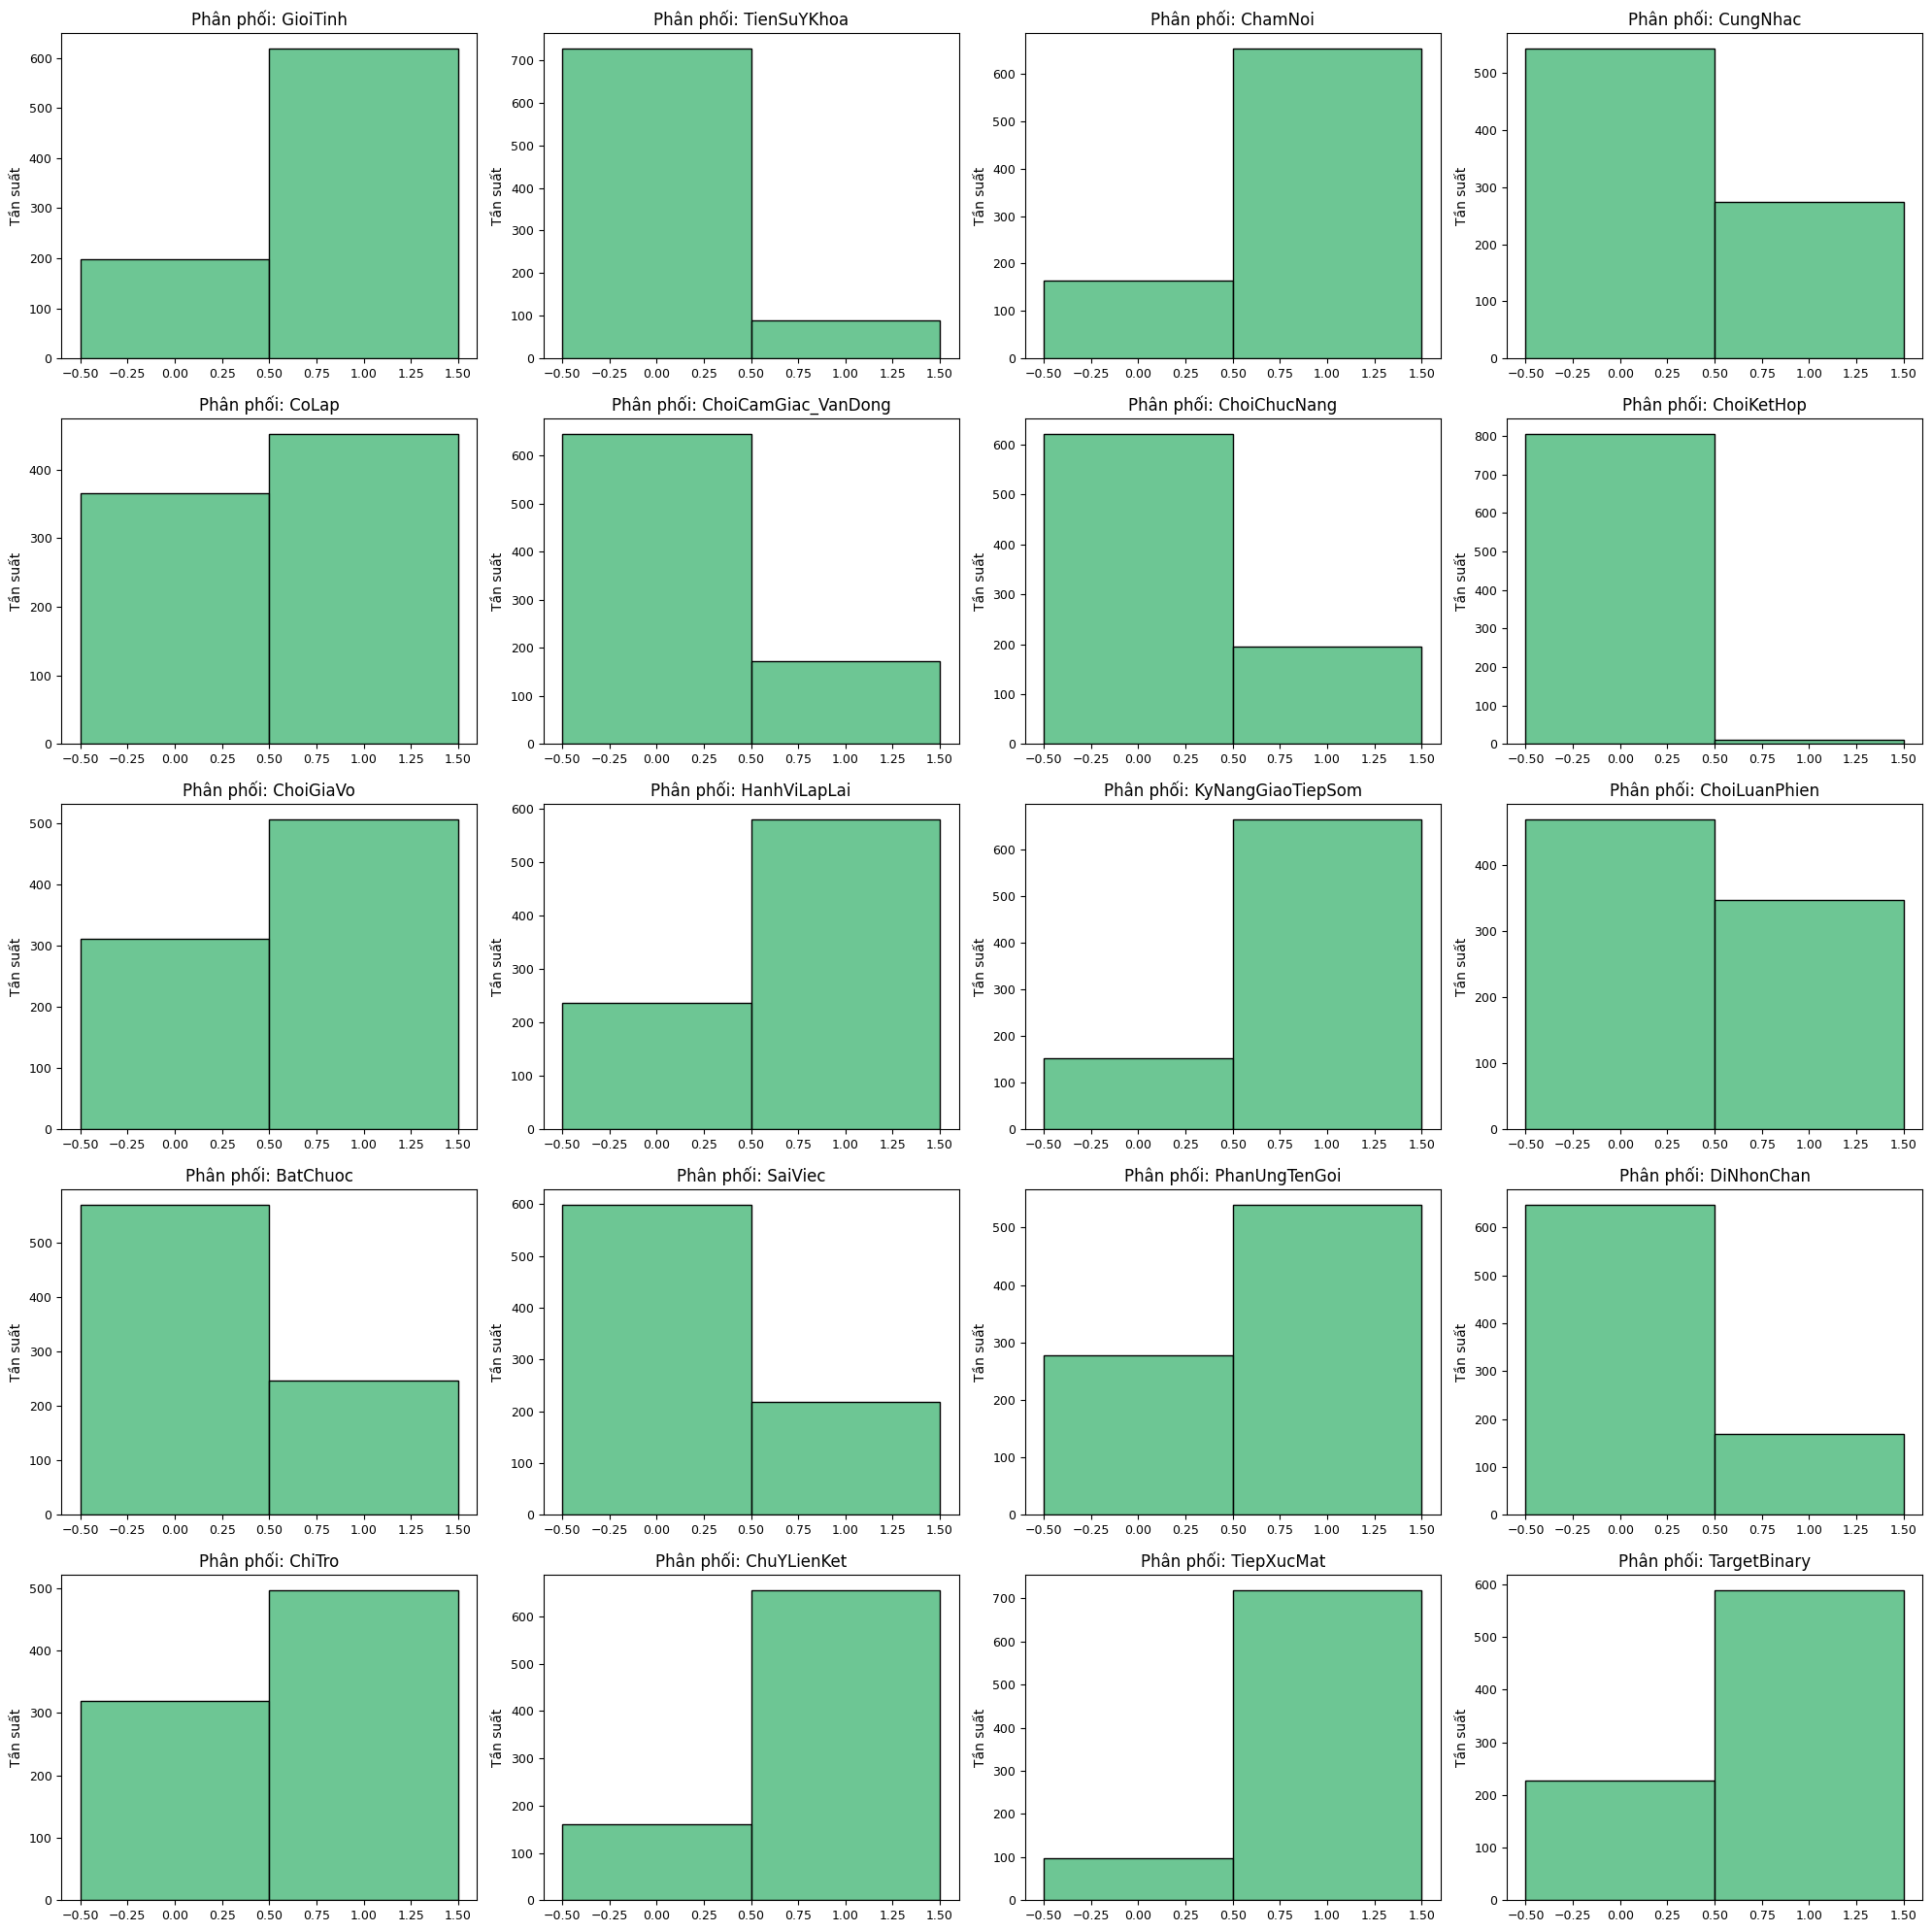

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Kiểm tra phân phối, lệch lớp Histogram


# Lấy các cột đặc trưng, loại trừ cột TargetBinary nếu muốn
feature_cols = df_final.columns[:20]  # bỏ TargetBinary nếu cần vẽ riêng

# Tạo lưới 5 hàng x 4 cột (20 biểu đồ), dư ra 1 slot nếu sau này thêm 1 cột
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
axes = axes.flatten()  # Flatten để dễ lặp

for i, feature in enumerate(feature_cols):
    sns.histplot(df_final[feature], bins=range(0, 5), discrete=True, color='mediumseagreen', ax=axes[i])
    axes[i].set_title(f'Phân phối: {feature}', fontsize=12)
    axes[i].set_xlabel('', fontsize=10)
    axes[i].set_ylabel('Tần suất', fontsize=10)
    axes[i].tick_params(axis='x', labelsize=9)
    axes[i].tick_params(axis='y', labelsize=9)

# Xoá các ô dư không sử dụng
for j in range(len(feature_cols), len(axes)):
    fig.delaxes(axes[j])

# Căn chỉnh lại layout
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(df_final)
if p < 0.05:
    print("Không phân phối chuẩn")

Không phân phối chuẩn


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16340.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
from scipy.stats import kendalltau
import pandas as pd
# 2. Kendall's Tau (Tương quan thứ bậc Kendall) giữa features và target
results = []

for col in df_final.columns[:-1]:  # Trừ cột TargetBinary
    corr, p = kendalltau(df_final[col], df_final['TargetBinary'])
    strength = ""
    if p < 0.05:
        if abs(corr) >= 0.3:
            strength = "Tương quan mạnh"
        elif abs(corr) >= 0.2:
            strength = "Tương quan vừa"
        else:
            strength = "Tương quan yếu"
        significance = "✅ Có ý nghĩa thống kê"
    else:
        strength = "-"
        significance = "❌ Không có ý nghĩa"

    results.append({
        "Đặc trưng": col,
        "Kendall's Tau": round(corr, 3) if corr is not None else None,
        "p-value": round(p, 3) if p is not None else None,
        "Mức độ tương quan": strength,
        "Ý nghĩa thống kê": significance
    })

# Chuyển kết quả thành DataFrame
df_kendall_analysis = pd.DataFrame(results)

# In toàn bộ kết quả
print(df_kendall_analysis.to_string(index=False))


          Đặc trưng  Kendall's Tau  p-value Mức độ tương quan      Ý nghĩa thống kê
           GioiTinh          0.049    0.159                 -    ❌ Không có ý nghĩa
        TienSuYKhoa         -0.260    0.000    Tương quan vừa ✅ Có ý nghĩa thống kê
            ChamNoi          0.254    0.000    Tương quan vừa ✅ Có ý nghĩa thống kê
           CungNhac         -0.124    0.000    Tương quan yếu ✅ Có ý nghĩa thống kê
              CoLap         -0.082    0.020    Tương quan yếu ✅ Có ý nghĩa thống kê
ChoiCamGiac_VanDong         -0.027    0.444                 -    ❌ Không có ý nghĩa
       ChoiChucNang          0.035    0.322                 -    ❌ Không có ý nghĩa
         ChoiKetHop          0.073    0.038    Tương quan yếu ✅ Có ý nghĩa thống kê
          ChoiGiaVo          0.069    0.050    Tương quan yếu ✅ Có ý nghĩa thống kê
       HanhViLapLai          0.101    0.004    Tương quan yếu ✅ Có ý nghĩa thống kê
  KyNangGiaoTiepSom          0.254    0.000    Tương quan vừa ✅ Có ý nghĩa t

In [ ]:
cols_to_drop = ['GioiTinh', 'ChoiCamGiac_VanDong', 'ChoiChucNang', 'DiNhonChan']

# Loại bỏ các cột không cần thiết
df_final = df_final.drop(columns=cols_to_drop)

In [ ]:
for i, col in enumerate(df_final.columns):
    print(f"Vị trí {i}: {col}")

Vị trí 0: TienSuYKhoa
Vị trí 1: ChamNoi
Vị trí 2: CungNhac
Vị trí 3: CoLap
Vị trí 4: ChoiKetHop
Vị trí 5: ChoiGiaVo
Vị trí 6: HanhViLapLai
Vị trí 7: KyNangGiaoTiepSom
Vị trí 8: ChoiLuanPhien
Vị trí 9: BatChuoc
Vị trí 10: SaiViec
Vị trí 11: PhanUngTenGoi
Vị trí 12: ChiTro
Vị trí 13: ChuYLienKet
Vị trí 14: TiepXucMat
Vị trí 15: TargetBinary


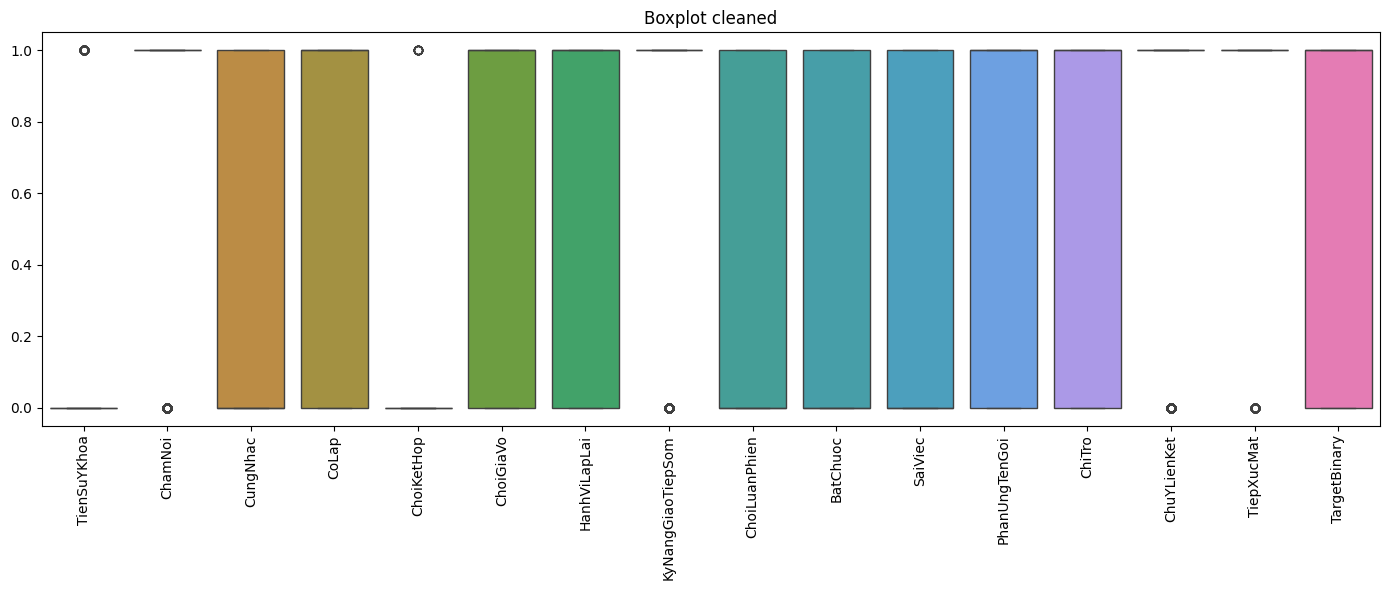

In [ ]:
selected_columns = df_final.columns[:16]

# 3. Vẽ boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_final[selected_columns])
plt.xticks(rotation=90)
plt.title("Boxplot cleaned")
plt.tight_layout()
plt.show()

In [ ]:
# Kiểm tra số lượng giá trị duy nhất
for col in df_final.columns:
    unique_vals = df_final[col].nunique(dropna=True)
    if unique_vals <= 3:
        print(f"Cột '{col}' chỉ có {unique_vals} giá trị duy nhất.")

Cột 'TienSuYKhoa' chỉ có 2 giá trị duy nhất.
Cột 'ChamNoi' chỉ có 2 giá trị duy nhất.
Cột 'CungNhac' chỉ có 2 giá trị duy nhất.
Cột 'CoLap' chỉ có 2 giá trị duy nhất.
Cột 'ChoiKetHop' chỉ có 2 giá trị duy nhất.
Cột 'ChoiGiaVo' chỉ có 2 giá trị duy nhất.
Cột 'HanhViLapLai' chỉ có 2 giá trị duy nhất.
Cột 'KyNangGiaoTiepSom' chỉ có 2 giá trị duy nhất.
Cột 'ChoiLuanPhien' chỉ có 2 giá trị duy nhất.
Cột 'BatChuoc' chỉ có 2 giá trị duy nhất.
Cột 'SaiViec' chỉ có 2 giá trị duy nhất.
Cột 'PhanUngTenGoi' chỉ có 2 giá trị duy nhất.
Cột 'ChiTro' chỉ có 2 giá trị duy nhất.
Cột 'ChuYLienKet' chỉ có 2 giá trị duy nhất.
Cột 'TiepXucMat' chỉ có 2 giá trị duy nhất.
Cột 'TargetBinary' chỉ có 2 giá trị duy nhất.


<ipython-input-70-5f45360d761f>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TargetBinary', y=col, data=df_final, ax=axes[i], estimator=np.mean, ci=None)
<ipython-input-70-5f45360d761f>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TargetBinary', y=col, data=df_final, ax=axes[i], estimator=np.mean, ci=None)
<ipython-input-70-5f45360d761f>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TargetBinary', y=col, data=df_final, ax=axes[i], estimator=np.mean, ci=None)
<ipython-input-70-5f45360d761f>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TargetBinary', y=col, data=df_final, ax=axes[i], estimator=np.mean, ci=None)
<ipython-input-70-5f45360d761f>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` f

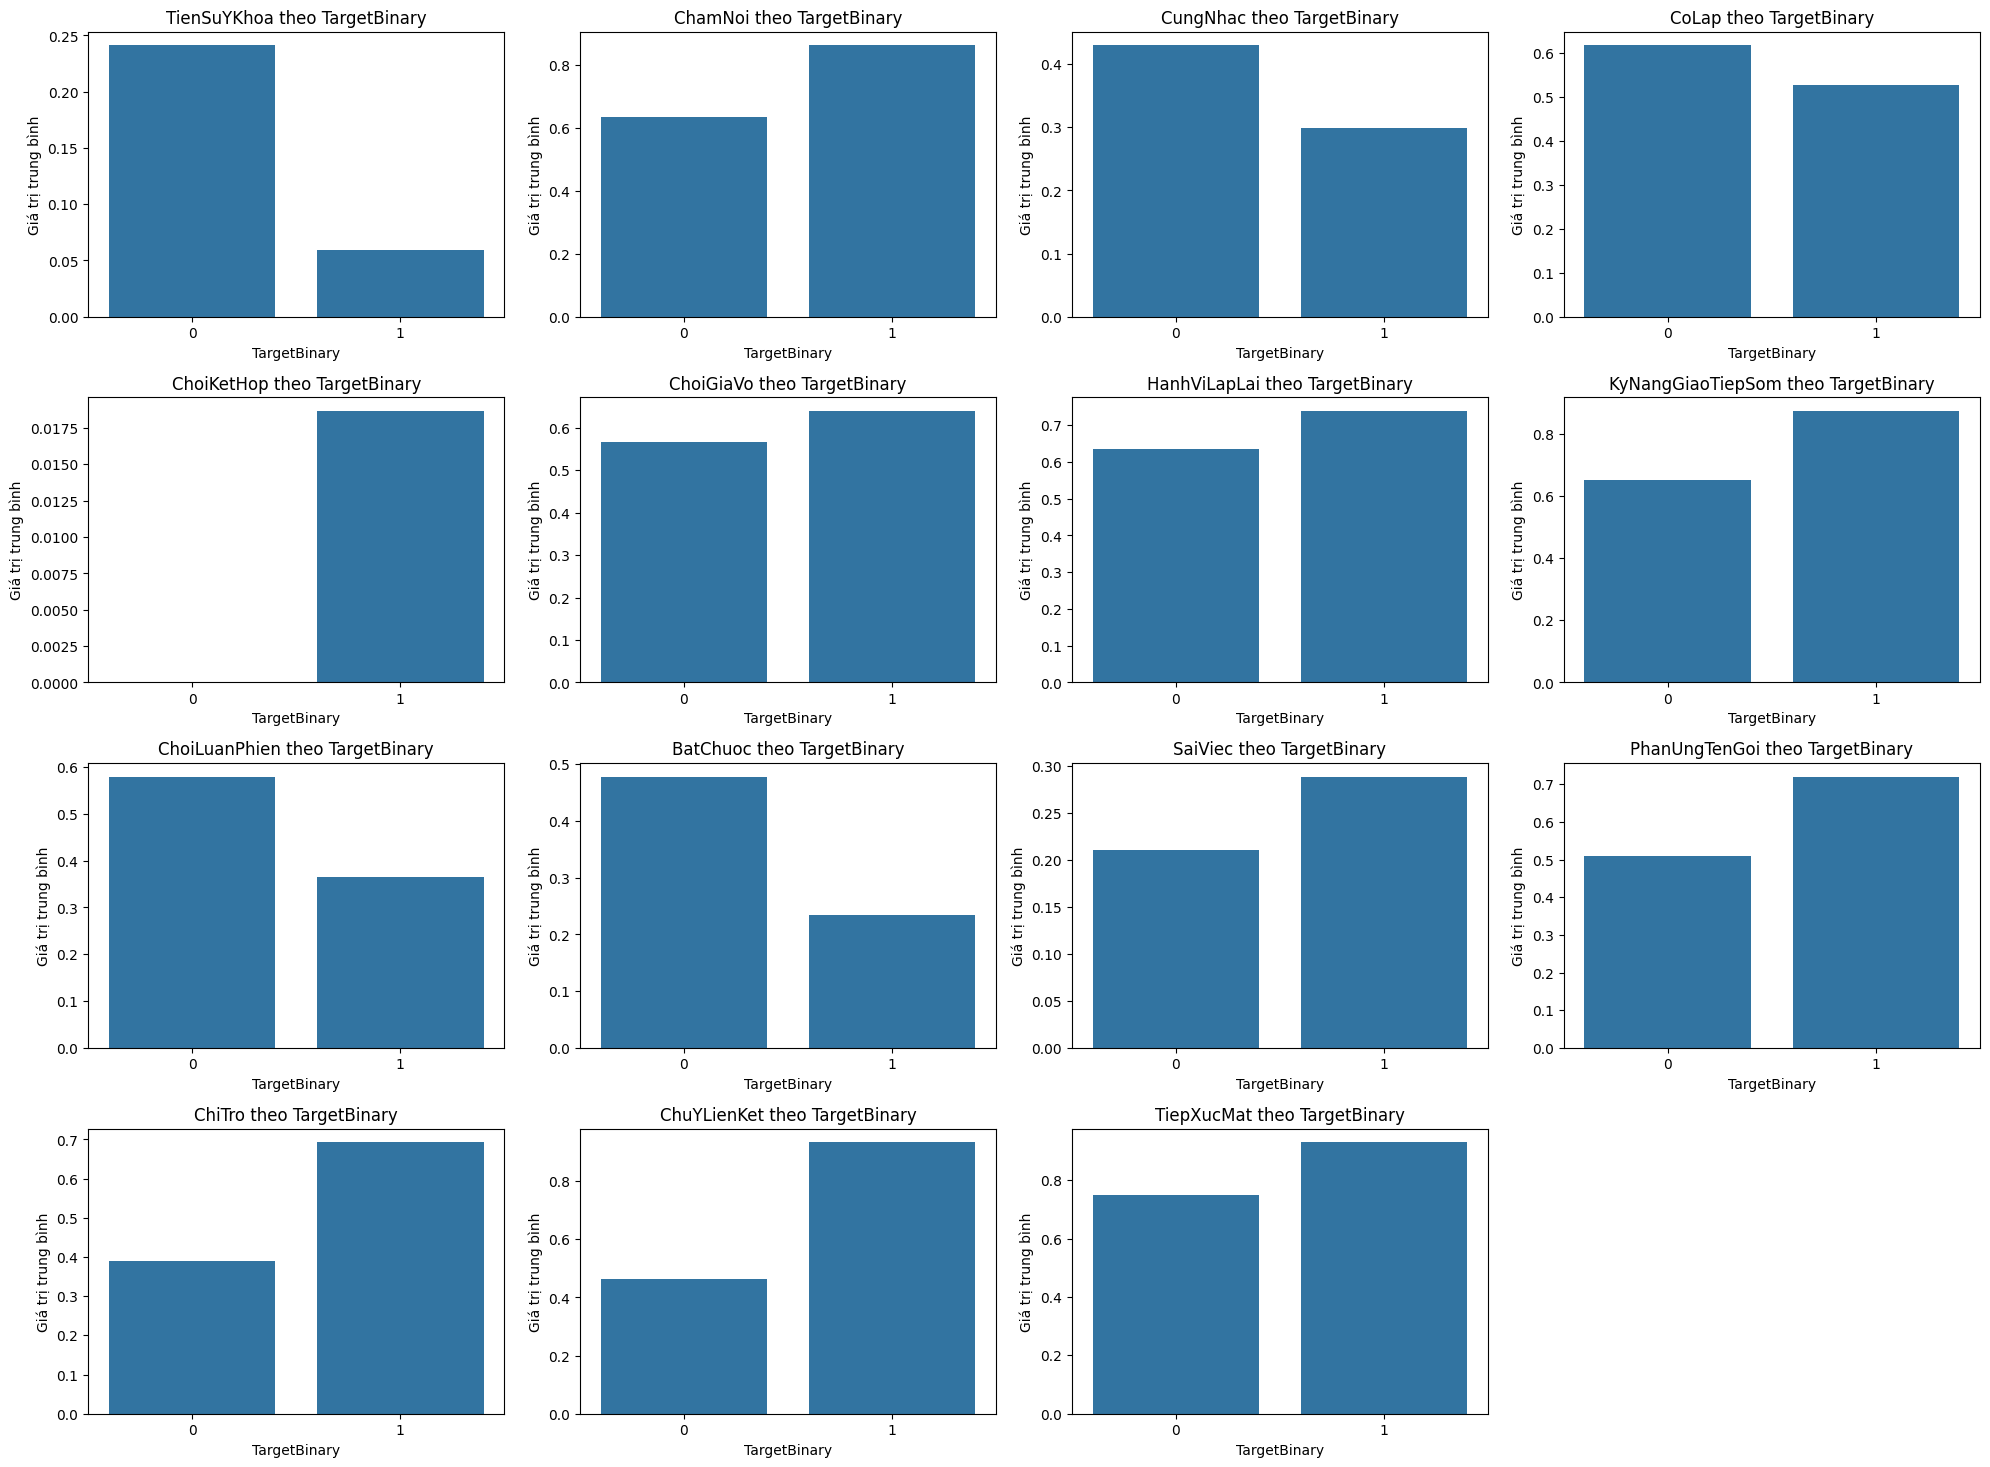

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# 4. Barplot giữa các đặc trưng và target


# Lấy danh sách cột đặc trưng (trừ TargetBinary)
feature_cols = [col for col in df_final.columns if col != 'TargetBinary']

# Tạo lưới 5x4 để vẽ tối đa 20 cột
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 18))
axes = axes.flatten()

# Vẽ barplot cho từng cột theo nhóm TargetBinary
for i, col in enumerate(feature_cols):
    sns.barplot(x='TargetBinary', y=col, data=df_final, ax=axes[i], estimator=np.mean, ci=None)
    axes[i].set_title(f"{col} theo TargetBinary")
    axes[i].set_xlabel("TargetBinary")
    axes[i].set_ylabel("Giá trị trung bình")

# Xoá các ô dư nếu feature < 20
for j in range(len(feature_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
print(df_final['ChoiKetHop'].value_counts())


ChoiKetHop
0.0    806
1.0     11
Name: count, dtype: int64


In [ ]:
# Loại bỏ các cột mất cân bằng
df_final = df_final.drop(columns='ChoiKetHop')

<ipython-input-81-4d86ddfd2c30>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TargetBinary', y=col, data=df_final, ax=axes[i], inner='quartile', palette='Set2')
<ipython-input-81-4d86ddfd2c30>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TargetBinary', y=col, data=df_final, ax=axes[i], inner='quartile', palette='Set2')
<ipython-input-81-4d86ddfd2c30>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TargetBinary', y=col, data=df_final, ax=axes[i], inner='quartile', palette='Set2')
<ipython-input-81-4d86ddfd2c30>:16

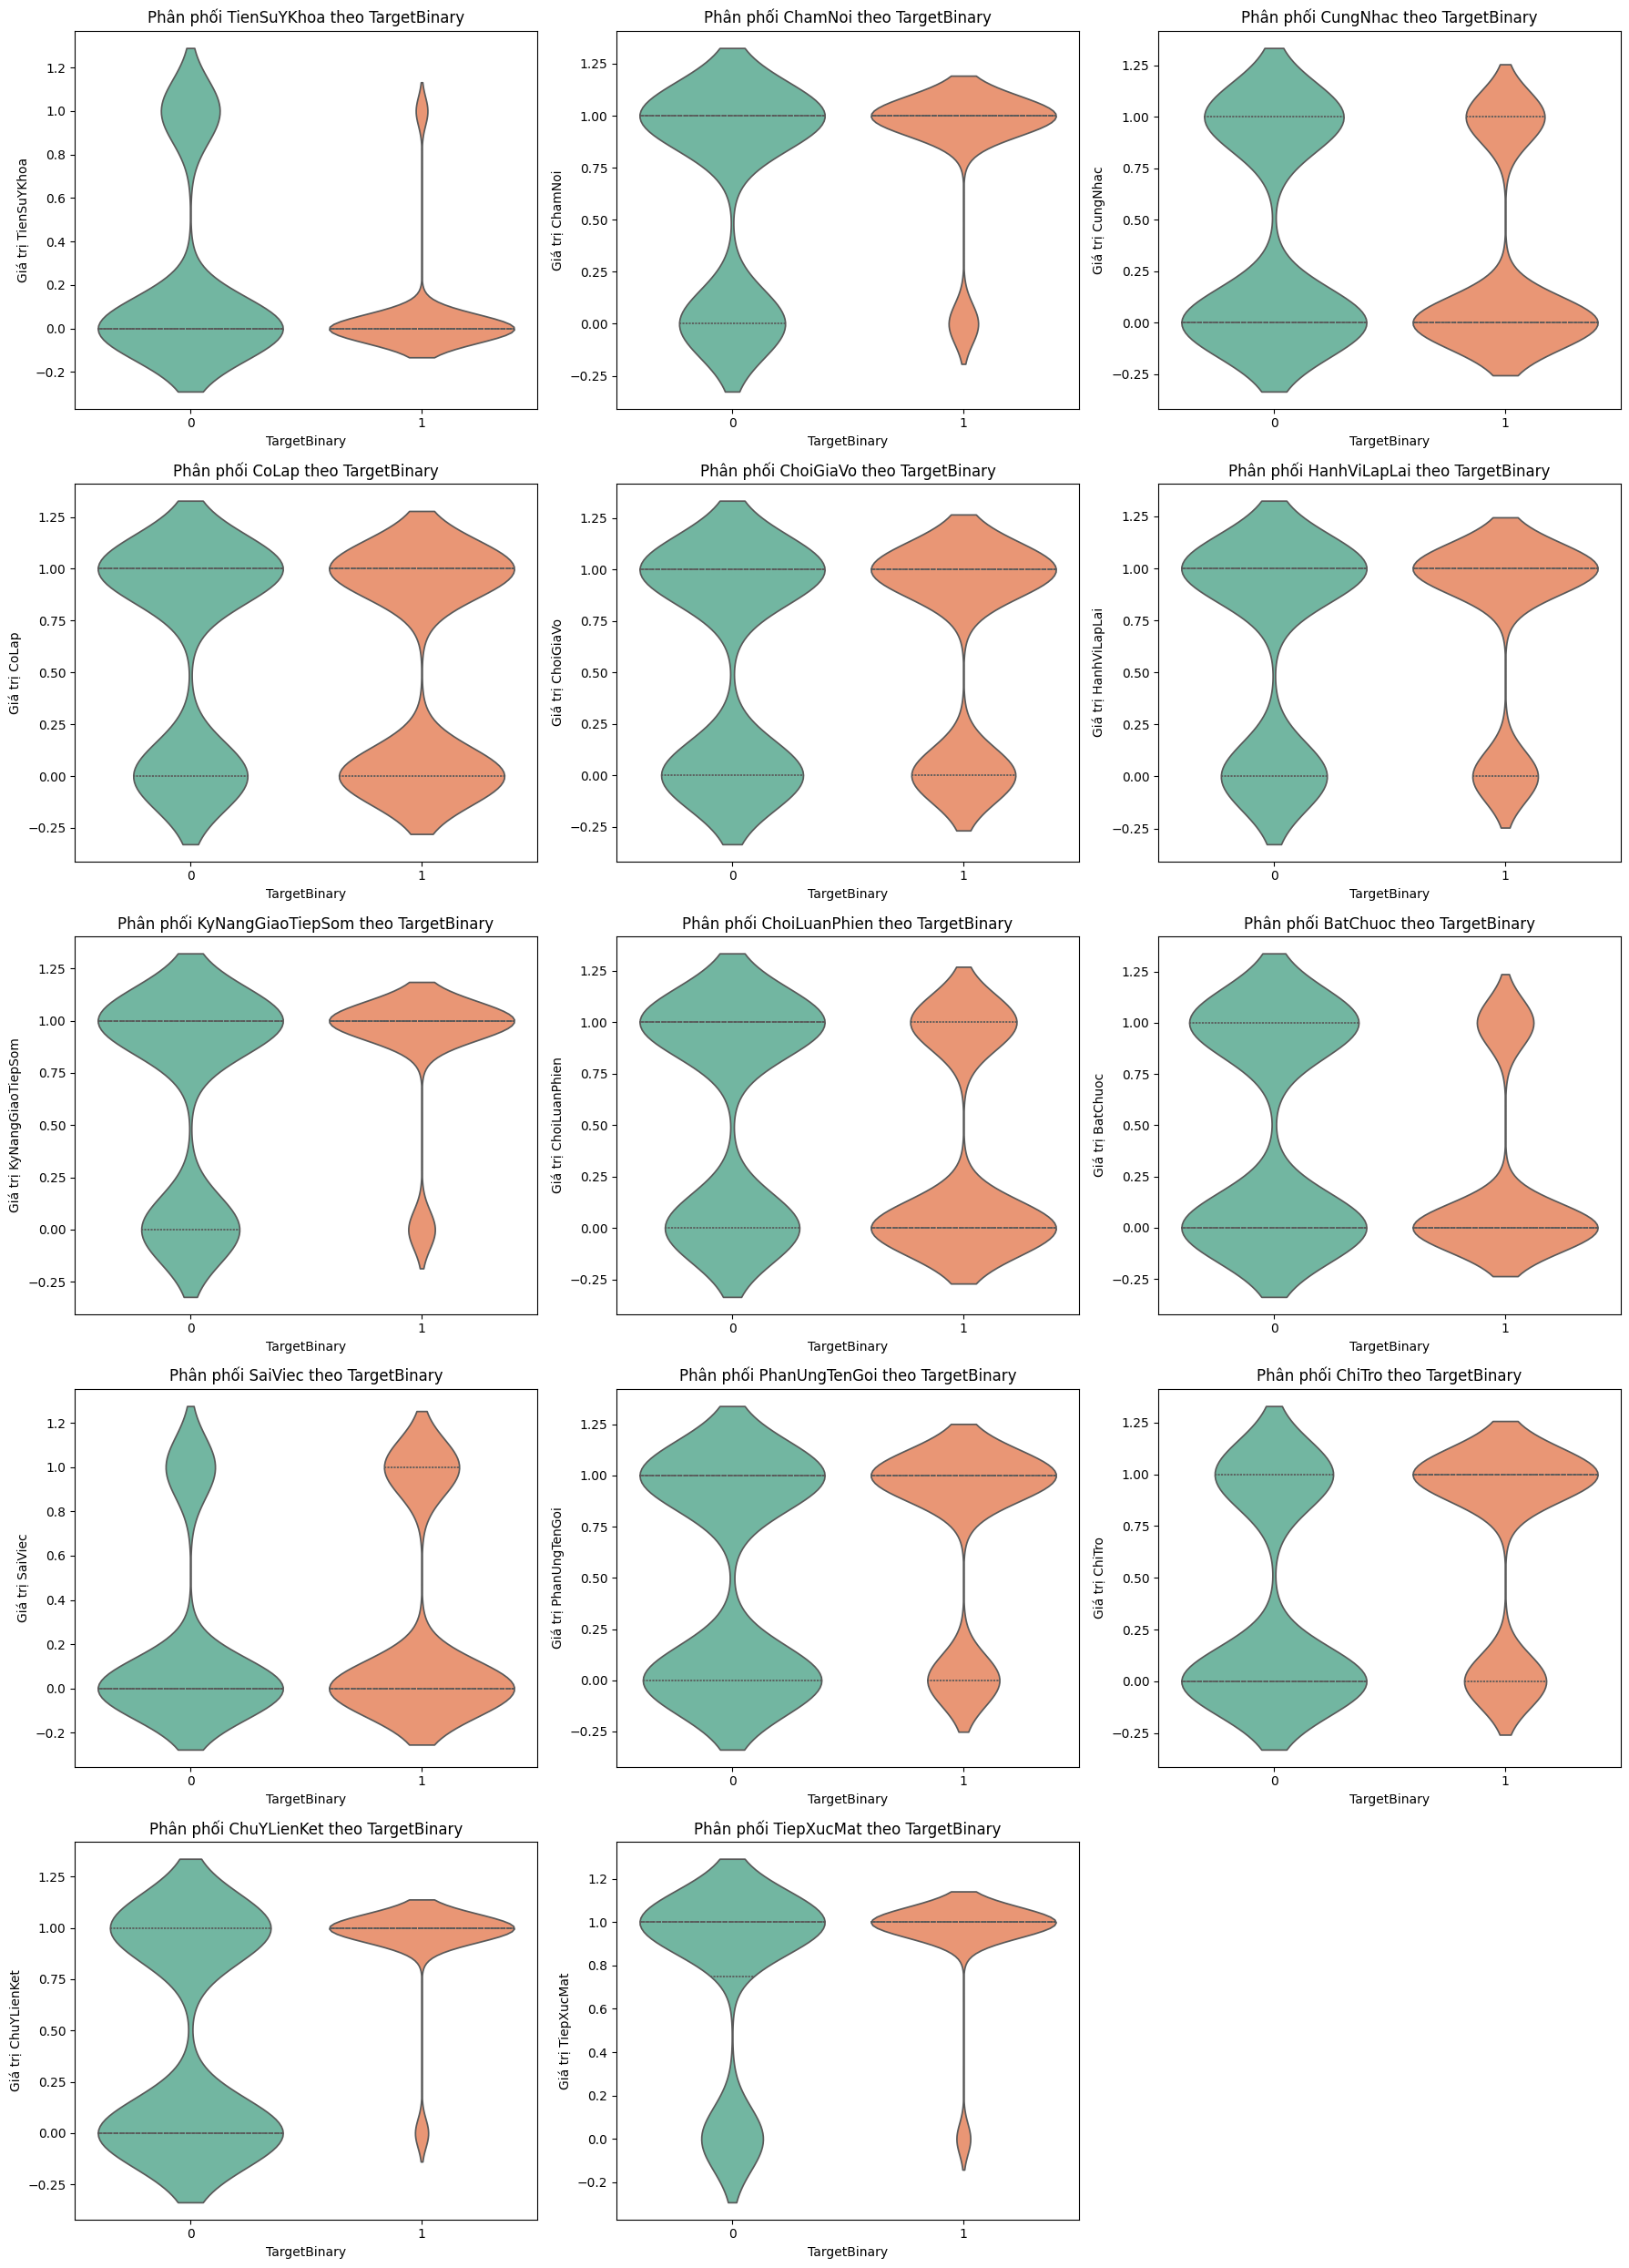

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Violin plot

# Lấy danh sách cột đặc trưng (trừ TargetBinary)
feature_cols = [col for col in df_final.columns if col != 'TargetBinary']

# Thiết lập lưới để hiển thị tất cả violin plots cho các đặc trưng
num_features = len(feature_cols)
rows = (num_features + 2) // 3  # 3 cột mỗi hàng
fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
axes = axes.flatten()

# Vẽ từng biểu đồ violin
for i, col in enumerate(feature_cols):
    sns.violinplot(x='TargetBinary', y=col, data=df_final, ax=axes[i], inner='quartile', palette='Set2')
    axes[i].set_title(f'Phân phối {col} theo TargetBinary')
    axes[i].set_xlabel('TargetBinary')
    axes[i].set_ylabel(f'Giá trị {col}')

# Ẩn các ô dư nếu số cột không chia hết cho 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử df là DataFrame với ít nhất 18 cột
feature_cols = df_final.columns[:14]

# Tạo lưới 6 hàng × 3 cột
fig, axes = plt.subplots(6, 3, figsize=(18, 18))
axes = axes.flatten()  # để lặp qua từng biểu đồ dễ hơn

for i, feature in enumerate(feature_cols):
    sns.histplot(df_final[feature], bins=20, kde=True, color='green', ax=axes[i])
    axes[i].set_title(f'Phân phối: {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Tần suất')

# Tắt các ô dư (nếu có)
for j in range(len(feature_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Chuyển y_train từ numpy → Series
y_train_series = pd.Series(y_train)

# Đổi nhãn số thành nhãn rõ nghĩa
y_train_named = y_train_series.map({
    0: "Không TK",
    1: "Có thể TK"
})
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.countplot(x=y_train_named, palette='viridis')
plt.title('Phân phối các lớp mục tiêu trong tập huấn luyện')
plt.xlabel('Lớp')
plt.ylabel('Số lượng')
plt.show()

In [ ]:
df_final.to_excel("merge_data_final.xlsx", index=False)